# 4.2 Evaluating machine-learning models

In the three examples presented in chapter 3, we split the data into a training set, a
validation set, and a test set. The reason not to evaluate the models on the same data
they were trained on quickly became evident: after just a few epochs, all three models
began to __overfit__. That is, their performance on never-before-seen data started stalling
(or worsening) compared to their performance on the training data—which always
improves as training progresses.

In machine learning, the goal is to achieve models that __generalize__—that perform
well on __never-before-seen data__—and overfitting is the central obstacle. You can only
control that which you can observe, so it’s crucial to be able to reliably measure the
generalization power of your model. The following sections look at strategies for mitigating
overfitting and maximizing generalization. In this section, we’ll focus on how
to measure generalization: how to evaluate machine-learning models.

## 4.2.1 Training, validation, and test sets

Evaluating a model always boils down to splitting the available data into three sets:
training, validation, and test. You train on the training data and evaluate your model
on the validation data. Once your model is ready for prime time, you test it one final
time on the test data.

You may ask, why not have two sets: a training set and a test set? You’d train on the
training data and evaluate on the test data. Much simpler!

The reason is that developing a model always involves tuning its configuration: for
example, choosing the number of layers or the size of the layers (called the __hyperparameters__
of the model, to distinguish them from the __parameters__, which are the network’s
weights). You do this tuning by using as a feedback signal the performance of
the model on the validation data.In essence, this tuning is a form of learning: a search
for a good configuration in some parameter space. As a result, tuning the configuration
of the model based on its performance on the validation set can quickly result in
overfitting to the validation set, even though your model is never directly trained on it.

Central to this phenomenon is the notion of __information leaks__. Every time you tune
a hyperparameter of your model based on the model’s performance on the validation
set, some information about the validation data leaks into the model. If you do this
only once, for one parameter, then very few bits of information will leak, and your validation
set will remain reliable to evaluate the model. But if you repeat this many
times—running one experiment, evaluating on the validation set, and modifying your
model as a result—then you’ll leak an increasingly significant amount of information
about the validation set into the model.

At the end of the day, you’ll end up with a model that performs artificially well on
the validation data, because that’s what you optimized it for. You care about performance
on completely new data, not the validation data, so you need to use a completely
different, never-before-seen dataset to evaluate the model: the test dataset. Your
model shouldn’t have had access to any information about the test set, even indirectly.If anything about the model has been tuned based on test set performance, then your measure of generalization will be flawed.

Splitting your data into training, validation, and test sets may seem straightforward,
but there are a few advanced ways to do it that can come in handy when little data is
available. Let’s review three classic evaluation recipes: simple hold-out validation, Kfold
validation, and iterated K-fold validation with shuffling.

### SIMPLE HOLD-OUT VALIDATION

Set apart some fraction of your data as your test set. Train on the remaining data, and
evaluate on the test set. As you saw in the previous sections, in order to prevent information
leaks, you shouldn’t tune your model based on the test set, and therefore you
should also reserve a validation set.

Schematically, hold-out validation looks like figure below. The following listing shows
a simple implementation.

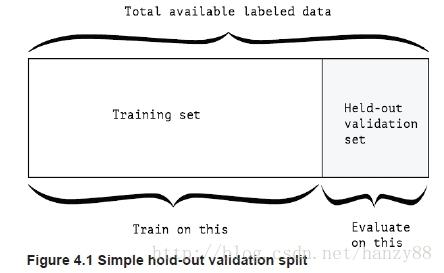

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is
available, then your validation and test sets may contain too few samples to be statistically
representative of the data at hand. This is easy to recognize: if different random
shuffling rounds of the data before splitting end up yielding very different measures
of model performance, then you’re having this issue. K-fold validation and iterated
K-fold validation are two ways to address this, as discussed next.

### K-FOLD VALIDATION

With this approach, you split your data into K partitions of equal size. For each partition
i, train a model on the remaining K – 1 partitions, and evaluate it on partition i.
Your final score is then the averages of the K scores obtained. This method is helpful
when the performance of your model shows significant variance based on your traintest
split. Like hold-out validation, this method doesn’t exempt you from using a distinct
validation set for model calibration.

Schematically, K-fold cross-validation looks like figure below.

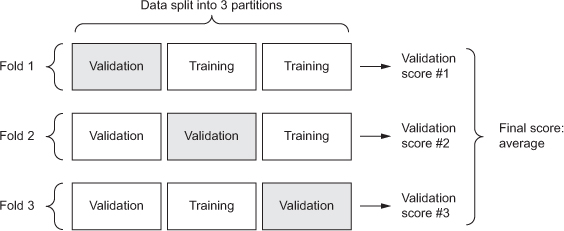

### ITERATED K-FOLD VALIDATION WITH SHUFFLING

This one is for situations in which you have relatively little data available and you need
to evaluate your model as precisely as possible. I’ve found it to be extremely helpful in
Kaggle competitions. It consists of applying K-fold validation multiple times, shuffling
the data every time before splitting it K ways. The final score is the average of the
scores obtained at each run of K-fold validation. Note that you end up training and
evaluating P × K models (where P is the number of iterations you use), which can very
expensive.

## 4.2.2 Things to keep in mind

Keep an eye out for the following when you’re choosing an evaluation protocol:
* __Data representativeness__—You want both your training set and test set to be representative of the data at hand. For instance, if you’re trying to classify images of digits, and you’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as your training set and the remaining 20% as your test set will result in your training set containing only classes 0–7, whereas your test set contains only classes 8–9. This seems like a ridiculous mistake, but it’s surprisingly common. For this reason, you usually should __randomly shuffle__ your data before splitting it into training and test sets.
* __The arrow of time__—If you’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), you should not randomly shuffle your data before splitting it, because doing so will create a temporal leak: your model will effectively be trained on data from the future. In such situations, you should always make sure all data in your test set is __posterior__ to the data in the training set.
* __Redundancy in your data__—If some data points in your data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, you’ll be testing on part of your training data, which is the worst thing you can do! Make sure your training set and validation set are disjoint.